In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [17]:
def get_data(filename):
  images, labels = [],[]
  with open(filename, 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
      labels.append(int(row[0]))
      img = np.array(row[1:]).astype(float)
      images.append(np.array_split(img, 28))
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [18]:
training_images = np.reshape(training_images, (training_images.shape[0], training_images.shape[1], training_images.shape[2], -1))
testing_images = np.reshape(testing_images, (testing_images.shape[0], testing_images.shape[1], testing_images.shape[2], -1))
def process_labels(labels):
  zeros = np.zeros((labels.shape[0], 24))
  for index in range(0, len(labels)):
    zeros[index][labels[index]-1] = 1
  return zeros

training_labels = process_labels(training_labels)
testing_labels = process_labels(testing_labels)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
train_gen = train_datagen.flow(training_images, training_labels, batch_size=32)
test_gen = validation_datagen.flow(testing_images, testing_labels, batch_size=32)
history = model.fit(train_gen, validation_data=test_gen, epochs=10)
model.evaluate(testing_images, testing_labels, verbose=1)

Epoch 1/10
858/858 [==============================] - 16s 19ms/step - loss: 2.4620 - accuracy: 0.2490 - val_loss: 1.2683 - val_accuracy: 0.6075
Epoch 2/10
858/858 [==============================] - 16s 19ms/step - loss: 1.4815 - accuracy: 0.5233 - val_loss: 0.6546 - val_accuracy: 0.7899
Epoch 3/10
858/858 [==============================] - 16s 19ms/step - loss: 1.0423 - accuracy: 0.6604 - val_loss: 0.5331 - val_accuracy: 0.8090
Epoch 4/10
858/858 [==============================] - 16s 19ms/step - loss: 0.7920 - accuracy: 0.7380 - val_loss: 0.2895 - val_accuracy: 0.8999
Epoch 5/10
858/858 [==============================] - 16s 19ms/step - loss: 0.6452 - accuracy: 0.7893 - val_loss: 0.2751 - val_accuracy: 0.9063
Epoch 6/10
858/858 [==============================] - 16s 19ms/step - loss: 0.5337 - accuracy: 0.8238 - val_loss: 0.2404 - val_accuracy: 0.9257
Epoch 7/10
858/858 [==============================] - 16s 18ms/step - loss: 0.4680 - accuracy: 0.8453 - val_loss: 0.1382 - val_accuracy:

[76.23053741455078, 0.845370888710022]

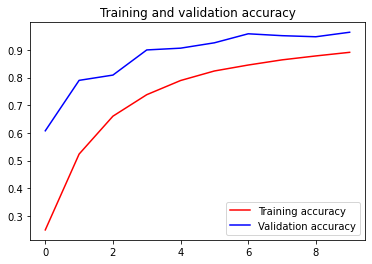

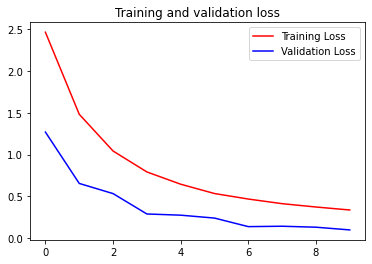

In [21]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()